Technical Audit of Heart Disease ADS

Guilherme Albertini and Martin Keenan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
df = pd.read_csv("drive/MyDrive/ResponsibleDataScience/analysis/heart_2020_cleaned.csv" , sep = "," , encoding = "utf-8")

# Model predictions
with open("drive/MyDrive/ResponsibleDataScience/analysis/temp/y_pred_test_v_clf.pkl", 'rb') as handle:
    y_pred_test_v_clf = pickle.load(handle)

with open("drive/MyDrive/ResponsibleDataScience/analysis/temp/y_pred_train_v_clf.pkl", 'rb') as handle:
    y_pred_train_v_clf = pickle.load(handle)

In [ ]:
cat_binary = [
    'HeartDisease', 
    'KidneyDisease', 
    'Stroke', 
    'Asthma', 
    'SkinCancer',
    'Smoking', 
    'AlcoholDrinking', 
    'DiffWalking', 
    'PhysicalActivity', 
]

cat_nonbinary = ['Diabetic', 'GenHealth']

numerical = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

sensitive_features = ['Sex', 'Race', 'AgeCategory'] # Sex=binary, Race/Age=categorical

In [ ]:
df['Diabetic'].value_counts(normalize=True)


No                         0.843206
Yes                        0.127588
No, borderline diabetes    0.021204
Yes (during pregnancy)     0.008002
Name: Diabetic, dtype: float64

In [ ]:
# Binary feature bar chart
binary_target = ['HeartDisease']
binary_health = [
    'KidneyDisease', 
    'Stroke', 
    'Asthma', 
    'SkinCancer',
]
binary_behavior = [
    'Smoking', 
    'AlcoholDrinking', 
    'DiffWalking', 
    'PhysicalActivity', 
]
binary_sensitive = ['Sex']

for col in cat_binary:
    df[col] = df[col].map({'Yes':1, 'No':0})

df['Sex'] = df['Sex'].map({'Male':1, 'Female':0})

cb_means = df[cat_binary].mean()

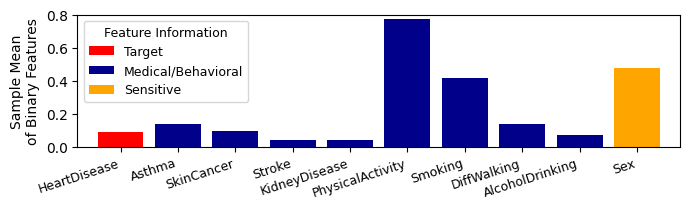

In [ ]:
binary_groups = [
    binary_target,
    binary_health,
    binary_behavior,
    binary_sensitive,
]

bar_feats = []
bar_vals = []
for group in binary_groups:
    means = df[group].mean()
    args = np.argsort(-means.values).tolist()
    bar_feats.append(np.array(group)[args].tolist())
    bar_vals.append(means.values[args])

bar_colors = ['red', 'darkblue', 'darkblue', 'orange']
bar_labels = ['Target', 'Medical/Behavioral', 'Medical/Behavioral', 'Sensitive']

fig, ax = plt.subplots()
fig.set_size_inches(7,2.2)
i = 0
for feats, vals, color, label in zip(bar_feats, bar_vals, bar_colors, bar_labels):
    x = list(range(i, i+len(feats)))
    if i==5: label=None
    ax.bar(x, vals, color=color, label=label)
    i += len(feats)
flat_feats = [item for sublist in bar_feats for item in sublist]
xticks = list(range(len(flat_feats)))
ax.set_xticks(xticks)
ax.set_xlim(min(xticks)-0.75, max(xticks)+0.75)
ax.set_xticklabels(flat_feats, size=9, rotation=18, ha='right')
ax.set_ylim(0,0.8)
legend = ax.legend(title='Feature Information', loc='upper left', fontsize=9)
legend.get_title().set_fontsize('9')
ax.set_ylabel('Sample Mean\nof Binary Features')

fig.tight_layout()
plt.show()

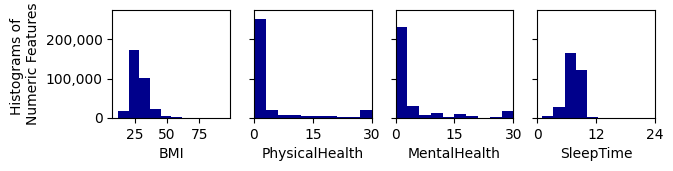

In [ ]:
# Numerical Feature histograms
colors = ['darkblue', 'darkblue', 'darkblue', 'darkblue']
import matplotlib as mpl
fig, ax = plt.subplots(1,4)
fig.set_size_inches(7,1.4)
for i, (feat, color) in enumerate(zip(numerical, colors)):
    ax[i].hist(df[feat], color=color)
    ax[i].set_ylim(0, 275_000)
    ax[i].set_xlabel(feat)
    fmt = lambda x, pos: '{:,.0f}'.format(x, pos)
    ax[i].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
    if i!=0:
        ax[i].set_yticklabels([])
ax[0].set_ylabel('Histograms of \nNumeric Features')

ax[1].set_xlim(0,30)
ax[2].set_xlim(0,30)
ax[1].set_xticks([0,15,30])
ax[2].set_xticks([0,15,30])
ax[3].set_xlim(0,24)
ax[3].set_xticks([0,12,24])
plt.show()

<ipython-input-9-7bf56d3d0c2a>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(counts0.index)
<ipython-input-9-7bf56d3d0c2a>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(counts1.index, rotation=25)
<ipython-input-9-7bf56d3d0c2a>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(counts0.index)
<ipython-input-9-7bf56d3d0c2a>:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(counts1.index, rotation=34)


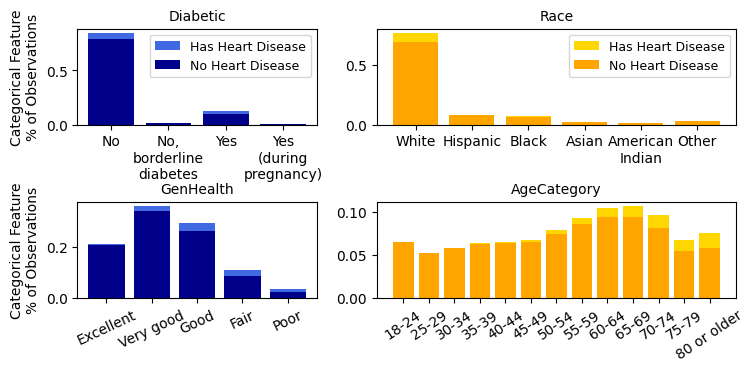

In [ ]:
# Categorical bar plots
N = len(df)
categorical_feats = ['Diabetic', 'GenHealth', 'Race', 'AgeCategory']
colors = ['darkblue', 'darkblue', 'orange', 'orange']
fig, ax = plt.subplots(2,2, width_ratios=[2,3], height_ratios=[1,1])
fig.set_size_inches(8.5,3.5)

# Diabetic
counts0 = df[df['HeartDisease']==0]['Diabetic'].value_counts()
counts1 = df[df['HeartDisease']==1]['Diabetic'].value_counts()
counts0 = counts0[['No', 'No, borderline diabetes','Yes', 'Yes (during pregnancy)']]
counts0.index = ['No', 'No,\nborderline\ndiabetes', 'Yes','Yes\n(during\npregnancy)']
counts1 = counts1[['No', 'No, borderline diabetes','Yes', 'Yes (during pregnancy)']]
counts1.index = ['No', 'No,\nborderline\ndiabetes', 'Yes','Yes\n(during\npregnancy)']
counts1 = counts0+counts1
counts0 = counts0 / N
counts1 = counts1 / N
ax[0,0].bar(counts1.index, counts1.values, color='royalblue', label='Has Heart Disease')
ax[0,0].bar(counts0.index, counts0.values, color='darkblue', label='No Heart Disease')
ax[0,0].set_ylabel('Categorical Feature\n% of Observations')
ax[0,0].legend(fontsize=9)
ax[0,0].set_xticklabels(counts0.index)
ax[0,0].set_title('Diabetic', size=10)

# GenHealth
counts0 = df[df['HeartDisease']==0]['GenHealth'].value_counts()
counts1 = df[df['HeartDisease']==1]['GenHealth'].value_counts()
counts0 = counts0[['Excellent', 'Very good', 'Good', 'Fair', 'Poor']]
counts1 = counts1[['Excellent', 'Very good', 'Good', 'Fair', 'Poor']]
counts1 = counts0+counts1
counts0 = counts0 / N
counts1 = counts1 / N
ax[1,0].bar(counts1.index, counts1.values, color='royalblue')
ax[1,0].bar(counts0.index, counts0.values, color='darkblue')
ax[1,0].set_ylabel('Categorical Feature\n% of Observations')
ax[1,0].set_xticklabels(counts1.index, rotation=25)
ax[1,0].set_title('GenHealth', size=10)

# Race
counts0 = df[df['HeartDisease']==0]['Race'].value_counts()
counts1 = df[df['HeartDisease']==1]['Race'].value_counts()
counts0 = counts0[['White', 'Hispanic', 'Black', 'Asian','American Indian/Alaskan Native','Other']]
counts0.index = ['White', 'Hispanic', 'Black', 'Asian','American\nIndian','Other']
counts1 = counts1[['White', 'Hispanic', 'Black', 'Asian','American Indian/Alaskan Native','Other']]
counts1.index = ['White', 'Hispanic', 'Black', 'Asian','American\nIndian','Other']
counts1 = counts0+counts1
counts0 = counts0 / N
counts1 = counts1 / N
ax[0,1].bar(counts1.index, counts1.values, color='gold', label='Has Heart Disease')
ax[0,1].bar(counts0.index, counts0.values, color='orange', label='No Heart Disease')
ax[0,1].legend(fontsize=9)
ax[0,1].set_xticklabels(counts0.index)
ax[0,1].set_title('Race', size=10)

# AgeCategory
counts0 = df[df['HeartDisease']==0]['AgeCategory'].value_counts()
counts1 = df[df['HeartDisease']==1]['AgeCategory'].value_counts()
indx = np.sort(counts0.index)
counts0 = counts0[indx]
counts1 = counts1[indx]
counts1 = counts0+counts1
counts0 = counts0 / N
counts1 = counts1 / N
ax[1,1].bar(counts1.index, counts1.values, color='gold', label='Has Heart Disease')
ax[1,1].bar(counts0.index, counts0.values, color='orange', label='No Heart Disease')
ax[1,1].set_xticklabels(counts1.index, rotation=34)
ax[1,1].set_title('AgeCategory', size=10)

fig.subplots_adjust(wspace=0.2, hspace=0.8)
plt.show()

<ipython-input-10-1a210e32053b>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[feats].corr()


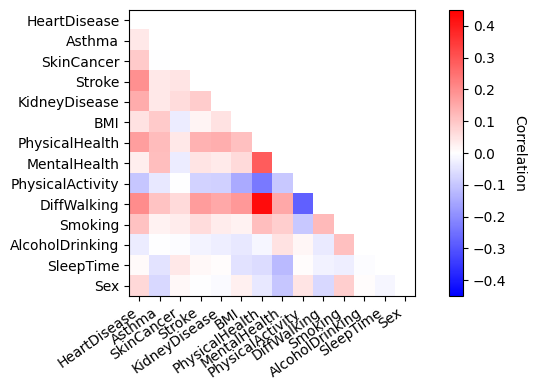

In [ ]:
# Correlation heatmap

feats = [
    'HeartDisease',
    'Asthma',
    'SkinCancer',
    'Stroke',
    'KidneyDisease',
    'Diabetic',
    'BMI',
    'PhysicalHealth',
    'MentalHealth',
    'GenHealth',
    'PhysicalActivity',
    'DiffWalking',
    'Smoking',
    'AlcoholDrinking',
    'SleepTime',
    'Sex',
    'Race',
    'AgeCategory'
]


corr = df[feats].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
corr.values[mask] = np.nan

fig, ax = plt.subplots()
fig.set_size_inches(7,4)
im = ax.imshow(corr, cmap='bwr', vmax=0.45, vmin=-0.45) #, interpolation='nearest')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom")
ax.set_xticks(list(range(corr.shape[0])))
ax.set_xticklabels(corr.index, rotation=35, ha='right')
ax.set_yticks(list(range(corr.shape[0])))
ax.set_yticklabels(corr.index)
fig.tight_layout()
plt.show()

###t-SNE Check for Data Separability

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique that is commonly used for visualizing high-dimensional data in two or three dimensions. The basic idea behind t-SNE is to find a low-dimensional representation of the data that preserves the relationships between the points in the high-dimensional space as much as possible. It does this by first computing pairwise similarities between the high-dimensional points using a Gaussian kernel, which gives more weight to nearby points than to distant points. Then, it constructs a low-dimensional map in which each point corresponds to a high-dimensional point, and the pairwise distances between points in the low-dimensional space are proportional to their similarities in the high-dimensional space.

The algorithm works by minimizing a cost function that measures the discrepancy between the pairwise similarities of the high-dimensional data and those of the low-dimensional map. The cost function is defined as the Kullback-Leibler divergence between the joint probabilities of the pairwise similarities in the high-dimensional and low-dimensional spaces. The minimization is done using gradient descent or another optimization method.

One of the advantages of t-SNE is that it is very effective at revealing the underlying structure of high-dimensional data, especially when there are nonlinear relationships between the variables. It is also robust to outliers and can preserve local structure in the data. However, it is computationally expensive and can be sensitive to the choice of hyperparameters, such as the perplexity parameter, which controls the balance between preserving global and local structure in the data.

In [ ]:
! pip install opentsne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 26.7 MB/s eta 0:00:00


##Notes on Perplexity 
In t-SNE, the perplexity parameter determines the width of the Gaussian kernel that is used to compute the pairwise similarities between the high-dimensional data points. Specifically, it determines the number of nearest neighbors that are considered for each point when computing the similarities. A higher perplexity value means that more neighbors are considered, which can result in a smoother and more global representation of the data. A lower perplexity value means that fewer neighbors are considered, which can result in a more local and detailed representation of the data.

The choice of the perplexity value can affect the resulting visualization and may require some trial and error. If the perplexity value is set too high, the resulting visualization may tend to smooth over the local structure and obscure important details. If the perplexity value is set too low, the resulting visualization may be too sensitive to noise and exhibit spurious structure.

## Feature Encoding Flaw
A fairly common mistake is to just assign a unique numerical value to each category of a feature, disregarding any order it holds (for ordinal variables) and, similarly, enforce integer orderings for nominal features that don’t naturally present any order. For example, in encoding `[dog,cat,dog,mouse,cat]` into `[1,2,1,3,2]` using `LabelEncoder`, the imposed ordinality means that the average of dog and mouse is cat. AgeCategory and GenHealth have a natural ranking. The other *nominal* categorical features do not and should just be one-hot encoded.

We adjust encoding with these changes in mind and compare the t-SNE visualization from the original to adjusted encoding schemes. The result? Data is more separable using the proper encoding scheme. This would probably lead to more accurate modeling downstream.

In [ ]:
with open('/content/drive/MyDrive/ResponsibleDataScience/analysis/pkl_files/data_df_processed.pkl', 'rb') as f:
    data_df = pickle.load(f)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder # categorical *with* natural ranking: AgeCategory, GenHealth (though he drops this one)
from sklearn.preprocessing import LabelEncoder # intended for HD target but author uses for all categorical features and enforces integer relationships
from sklearn.compose import ColumnTransformer

X = data_df.drop(columns=['HeartDisease'])
feature_names = X.columns
df_numeric = X._get_numeric_data()
df_categorical = X[X.columns.difference(df_numeric.columns)]
df_categorical.head()



,AgeCategory,AlcoholDrinking,Asthma,Diabetic,DiffWalking,GenHealth,KidneyDisease,PhysicalActivity,Race,Sex,SkinCancer,Smoking,Stroke
0,55-59,No,Yes,Yes,No,Very good,No,Yes,White,Female,Yes,Yes,No
1,80 or older,No,No,No,No,Very good,No,Yes,White,Female,No,No,Yes
2,65-69,No,Yes,Yes,No,Fair,No,Yes,White,Male,No,Yes,No
3,75-79,No,No,No,No,Good,No,No,White,Female,Yes,No,No
4,40-44,No,No,No,Yes,Very good,No,Yes,White,Female,No,No,No


In [ ]:
df_categorical['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [ ]:
df_numeric.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


In [ ]:
data_wrong_encoding = X.apply(lambda col: LabelEncoder().fit_transform(col)) # what he did

# Define the column transformer with one-hot encoding columns,
# and ordinal encoding for the GenHealth and AgeCategory column. First fit on a sample OHE to get the column names for pandas dataframe
ohe_cols = list(df_categorical.columns.difference(['GenHealth','AgeCategory']))

ct = ColumnTransformer([('onehot', OneHotEncoder(), ohe_cols),
                        ('ordinal', OrdinalEncoder(), ['GenHealth','AgeCategory'])])
# Fit and transform the dataframe using the column transformer
ct = ct.fit(X)
features = ct.get_feature_names_out()
transformed_df = ct.transform(X)

# Convert the transformed data to a dataframe
data_proper_encoding = pd.DataFrame(transformed_df,columns=features)


In [ ]:
data_proper_encoding.head()

,onehot__AlcoholDrinking_No,onehot__AlcoholDrinking_Yes,onehot__Asthma_No,onehot__Asthma_Yes,onehot__Diabetic_No,"onehot__Diabetic_No, borderline diabetes",onehot__Diabetic_Yes,onehot__Diabetic_Yes (during pregnancy),onehot__DiffWalking_No,onehot__DiffWalking_Yes,...,onehot__Sex_Female,onehot__Sex_Male,onehot__SkinCancer_No,onehot__SkinCancer_Yes,onehot__Smoking_No,onehot__Smoking_Yes,onehot__Stroke_No,onehot__Stroke_Yes,ordinal__GenHealth,ordinal__AgeCategory
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0,7.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,12.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,9.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,11.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,4.0


In [ ]:
data_wrong_encoding.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,223,1,0,0,3,30,0,0,7,5,2,1,4,4,1,0,1
1,524,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0
2,1103,1,0,0,20,30,0,1,9,5,2,1,1,7,1,0,0
3,883,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1
4,837,0,0,0,28,0,1,0,4,5,0,1,4,7,0,0,0


In [ ]:
N = 10_000
X_train_wrong = data_wrong_encoding[:N].to_numpy()
X_train_proper = data_proper_encoding[:N].to_numpy()
y_train = data_df[['HeartDisease']][:N]

In [ ]:
def plot(
    x,
    y,
    ax=None,
    title=None,
    draw_legend=True,
    colors=None,
    legend_kwargs=None,
    label_order=None,
    **kwargs
):
    import matplotlib

    if ax is None:
        _, ax = matplotlib.pyplot.subplots(figsize=(8, 8))

    if title is not None:
        ax.set_title(title)

    plot_params = {"alpha": kwargs.get("alpha", 0.6), "s": kwargs.get("s", 1)}

    # Create main plot
    if label_order is not None:
        assert all(np.isin(np.unique(y), label_order))
        classes = [l for l in label_order if l in np.unique(y)]
    else:
        classes = np.unique(y)
    if colors is None:
        default_colors = matplotlib.rcParams["axes.prop_cycle"]
        colors = {k: v["color"] for k, v in zip(classes, default_colors())}

    point_colors = list(y['HeartDisease'].map(colors.get))
    ax.scatter(x[:, 0], x[:, 1], c=point_colors, rasterized=True, **plot_params)

    
    # Hide ticks and axis
    ax.set_xticks([]), ax.set_yticks([]), ax.axis("off")

    if draw_legend:
        legend_handles = [
            matplotlib.lines.Line2D(
                [],
                [],
                marker="s",
                color="w",
                markerfacecolor=colors[yi],
                ms=10,
                alpha=1,
                linewidth=0,
                label=yi,
                markeredgecolor="k",
            )
            for yi in classes
        ]
        legend_kwargs_ = dict(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False, )
        if legend_kwargs is not None:
            legend_kwargs_.update(legend_kwargs)
        ax.legend(handles=legend_handles, **legend_kwargs_)



In [ ]:
from openTSNE import TSNE, affinity, initialization
import plotly.express as px

perplexity = [30, 50, 200, 800, 1000, 3000]

embeddings = []
for p in perplexity:
  embedding_pca_cosine = TSNE(
  n_iter = 500,
  perplexity=p,
  initialization="pca",
  metric="cosine",
  n_jobs=256,
  random_state=42,
  verbose=True,
  ).fit(X_train_wrong)
  embeddings.append(embedding_pca_cosine)



--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, metric='cosine', n_jobs=256, random_state=42,
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using cosine distance...
   --> Time elapsed: 8.91 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 1.20 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.13 seconds
===> Running optimization with exaggeration=12.00, lr=833.33 for 250 iterations...
Iteration   50, KL divergence 4.3890, 50 iterations in 5.1019 sec
Iteration  100, KL divergence 4.4515, 50 iterations in 3.3851 sec
Iteration  150, KL divergence 4.4473, 50 iterations in 3.7017 sec
Iteration  200, KL divergence 4.4469, 50 iterations in 6.3524 sec
Iteration  250, KL divergence 4.4468, 50 iterations in 4.9727 sec
   --> Time elapsed: 23.52 seconds
===> Running optimizatio

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Error in sys.excepthook:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2101, in showtraceback
    stb = self.InteractiveTB.structured_traceback(etype,
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1367, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1267, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/usr/local/lib/pyt

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 248, in wrapped
    return f(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 281, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/usr/lib/python3.10/inspect.py", line 1662, in getinnerframes
    frameinfo = (tb.tb_frame,) + getframeinfo(tb, context)
  File "/us

KeyboardInterrupt: ignored

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
plot(embeddings[0], y_train, title=f"Perplexity of {perplexity[0]}", ax=ax[0, 0], draw_legend=False)
plot(embeddings[1], y_train, title=f"Perplexity of {perplexity[1]}", ax=ax[0, 1], draw_legend=True)
plot(embeddings[2], y_train, title=f"Perplexity of {perplexity[2]}", ax=ax[1, 0], draw_legend=False)
plot(embeddings[3], y_train, title=f"Perplexity of {perplexity[3]}", ax=ax[1, 1], draw_legend=True)
plot(embeddings[4], y_train, title=f"Perplexity of {perplexity[4]}", ax=ax[2, 0], draw_legend=False)
plot(embeddings[5], y_train, title=f"Perplexity of {perplexity[5]}", ax=ax[2, 1], draw_legend=True)

plt.tight_layout()
plt.savefig('wrong_tSNE.png')

In [ ]:
embeddings = []
for p in perplexity:
  embedding_pca_cosine = TSNE(
  n_iter = 500,
  perplexity=p,
  initialization="pca",
  metric="cosine",
  n_jobs=256,
  random_state=42,
  verbose=True,
  ).fit(X_train_proper)
  embeddings.append(embedding_pca_cosine)


In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
plot(embeddings[0], y_train, title=f"Perplexity of {perplexity[0]}", ax=ax[0, 0], draw_legend=False)
plot(embeddings[1], y_train, title=f"Perplexity of {perplexity[1]}", ax=ax[0, 1], draw_legend=True)
plot(embeddings[2], y_train, title=f"Perplexity of {perplexity[2]}", ax=ax[1, 0], draw_legend=False)
plot(embeddings[3], y_train, title=f"Perplexity of {perplexity[3]}", ax=ax[1, 1], draw_legend=True)
plot(embeddings[4], y_train, title=f"Perplexity of {perplexity[4]}", ax=ax[2, 0], draw_legend=False)
plot(embeddings[5], y_train, title=f"Perplexity of {perplexity[5]}", ax=ax[2, 1], draw_legend=True)

plt.tight_layout()
plt.savefig('right_tSNE.png')

###SHAP Analysis

In [ ]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 7.5 MB/s eta 0:00:00


In [ ]:
import shap
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import pickle

# Load the pickle files 
with open('/content/drive/MyDrive/ResponsibleDataScience/analysis/pkl_files/X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
with open('/content/drive/MyDrive/ResponsibleDataScience/analysis/pkl_files/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('/content/drive/MyDrive/ResponsibleDataScience/analysis/pkl_files/X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)
with open('/content/drive/MyDrive/ResponsibleDataScience/analysis/pkl_files/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

# specify the used classifiers -- exact params as author
clf1 = LogisticRegression().fit(X_train, y_train)
#clf2 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
clf3 = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic', n_estimators= 5, random_state=42).fit(X_train, y_train)
clf4 = RandomForestClassifier(n_estimators=3 , max_depth=6  , max_features=4).fit(X_train, y_train)
#clf5 = AdaBoostClassifier(n_estimators=100,learning_rate=1, random_state = 1).fit(X_train, y_train)

In [ ]:
print(f' X_train: {X_train.shape} & X_test: {X_test.shape}')
print(f' y_train: {y_train.shape} & y_test: {y_test.shape}')

 X_train: (255836, 13) & X_test: (63959, 13)
 y_train: (255836,) & y_test: (63959,)


In [ ]:
X.drop(['AlcoholDrinking','PhysicalActivity','GenHealth', 'SleepTime'],axis=1,inplace=True)
feature_names=list(X.columns)
dict(zip(feature_names, range(len(feature_names))))

{'BMI': 0,
 'Smoking': 1,
 'Stroke': 2,
 'PhysicalHealth': 3,
 'MentalHealth': 4,
 'DiffWalking': 5,
 'Sex': 6,
 'AgeCategory': 7,
 'Race': 8,
 'Diabetic': 9,
 'Asthma': 10,
 'KidneyDisease': 11,
 'SkinCancer': 12}

In [ ]:

class SHAPPlotter:
    def __init__(self, model, X, y, feature_names=None, target_col=1, N = 500):
        self.model = model
        # Generate a random set of indices
        indices = np.random.choice(X.shape[0], size=N, replace=False)
        self.X = X[indices,:] 
        self.y = y[indices] 
        self.feature_names = feature_names
        self.classes = ['No HD', 'HD'] #list(np.unique(y)) 
        self.target_col = target_col # I think HD is second label, so idx 1
        self.need_target = True
        if isinstance(model, KNeighborsClassifier):
            self.explainer =  shap.KernelExplainer(model.predict_proba, self.X)
            self.shap_values = self.explainer.shap_values(self.X)
        elif isinstance(model, RandomForestClassifier) or isinstance(model, AdaBoostClassifier):
            self.explainer =  shap.TreeExplainer(model)
            self.shap_values = self.explainer.shap_values(self.X)
        elif isinstance(model, XGBClassifier):
            self.explainer = shap.TreeExplainer(model)
            self.shap_values = self.explainer.shap_values(self.X)
            self.need_target = False
        elif isinstance(model, LogisticRegression):
            self.need_target = False
            self.explainer =  shap.LinearExplainer(model, self.X)
            self.shap_values = self.explainer.shap_values(self.X)
        else:
            raise ValueError("Invalid model type. Model must be one of: KNeighborsClassifier, RandomForestClassifier, AdaBoostClassifier, XGBClassifier, or LogisticRegression.")
        
        # Get misclassified and correctly classified indices
        preds = model.predict(self.X)
        self.misclassified_indices = np.where(preds != self.y)[0]
        self.all_indices = np.concatenate((self.misclassified_indices, np.where(preds == self.y)[0]))
    
    def plot_force(self, select_idx=0, misclassified=False):
        shap.initjs()
        if misclassified:
            index = self.misclassified_indices[select_idx]
        else:
            index = self.all_indices[select_idx]

        if self.need_target:
          return shap.force_plot(
              self.explainer.expected_value[self.target_col],
              self.shap_values[self.target_col][index],
              self.X[index],
              feature_names=self.feature_names
          )
        else:
          return shap.force_plot(
              self.explainer.expected_value,
              self.shap_values[index],
              self.X[index],
              feature_names=self.feature_names
          )
    
    def plot_summary(self, misclassified=False):
        shap.initjs()
        if misclassified:
            indices = self.misclassified_indices
        else:
            indices = self.all_indices

        if self.need_target:
          return shap.summary_plot(
            self.shap_values[self.target_col][indices],
            self.X[indices],
            feature_names=self.feature_names,
            class_names=self.classes,
            plot_type='violin',
            max_display=8)
        else:
          return shap.summary_plot(
            self.shap_values[indices],
            self.X[indices],
            feature_names=self.feature_names,
            class_names=self.classes,
            plot_type='violin',
            max_display=8)
    
    def plot_dependence(self, feature=0, misclassified=False):
        shap.initjs()
        if misclassified:
            indices = self.misclassified_indices
        else:
            indices = self.all_indices
        if self.need_target:
          return shap.dependence_plot(
              feature,
              self.shap_values[self.target_col][indices],
              self.X[indices],
              feature_names=self.feature_names,
              interaction_index='auto',
              display_features=self.X[indices]
          )
        else:
          return shap.dependence_plot(
              feature,
              self.shap_values[indices],
              self.X[indices],
              feature_names=self.feature_names,
              interaction_index='auto',
              display_features=self.X[indices]
          )

    def plot_decision(self, misclassified=False):
        shap.initjs()
        if misclassified:
            indices = self.misclassified_indices
        else:
            indices = self.all_indices

        if self.need_target:
          return shap.decision_plot(
              self.explainer.expected_value[self.target_col],
              self.shap_values[self.target_col],
              feature_names=self.feature_names,
              highlight=indices,
          )
        else:
          return shap.decision_plot(
              self.explainer.expected_value,
              self.shap_values,
              feature_names=self.feature_names,
              highlight=indices,
          )



In [ ]:
log = SHAPPlotter(model=clf1, X=X_test, y=y_test, target_col=1, feature_names=feature_names, N = 25_000) 
xgb = SHAPPlotter(model=clf3, X=X_test, y=y_test, target_col=1, feature_names=feature_names, N = 25_000) 
rf = SHAPPlotter(model=clf4, X=X_test, y=y_test, target_col=1, feature_names=feature_names, N = 25_000) 


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


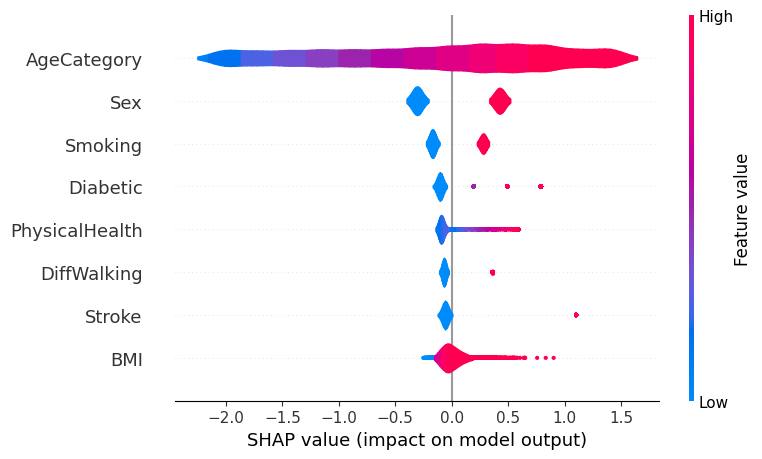

In [ ]:
# all examples
log.plot_summary(misclassified=False)

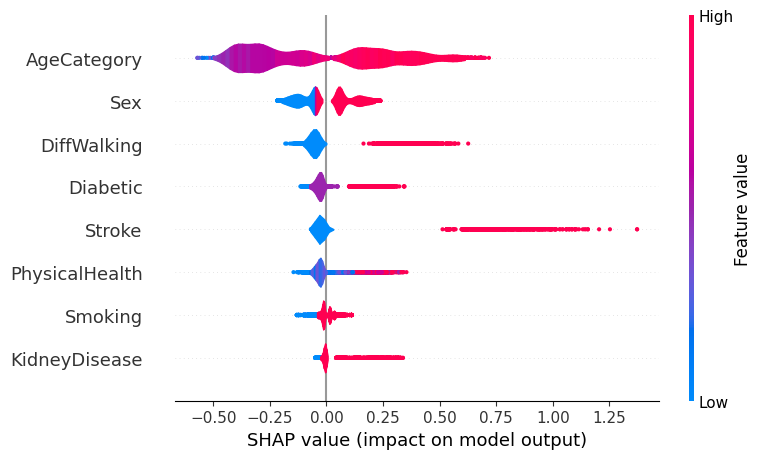

In [ ]:
# all examples
xgb.plot_summary(misclassified=False)

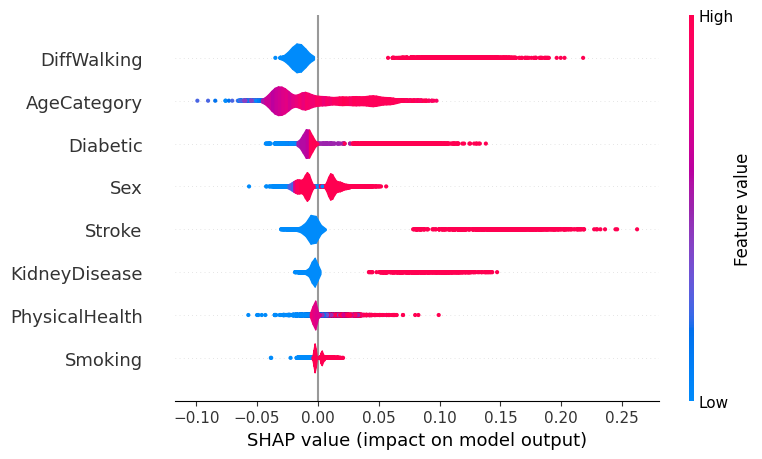

In [ ]:
# all examples
rf.plot_summary(misclassified=False)t-

In [ ]:
log.plot_dependence(feature=3, misclassified=False)

In [ ]:
log.plot_force(123)

## Outcomes

In [ ]:
%%capture
!pip install fairlearn

In [ ]:
import numpy as np
import pandas as pd
import pickle

In [ ]:
y_pred_test_v_clf = pickle.load(open('drive/MyDrive/ResponsibleDataScience/analysis/temp/y_pred_test_v_clf.pkl', 'rb'))
y_pred_train_v_clf = pickle.load(open('drive/MyDrive/ResponsibleDataScience/analysis/temp/y_pred_train_v_clf.pkl', 'rb'))

In [ ]:
data_df = pd.read_csv("drive/MyDrive/ResponsibleDataScience/analysis/heart_2020_cleaned.csv" , sep = "," , encoding = "utf-8")

from sklearn.preprocessing import LabelEncoder
cat_df = data_df.select_dtypes(include=['object'])

# Create the encoder variable
encoder = LabelEncoder()

les = {} #mk
for i in cat_df:
    # fit the categoral feature to the encoding method
    data_df[i] = encoder.fit_transform(data_df[i])
    les[i] = encoder #mk
    encoder = LabelEncoder() #mk

# Removing unnecessary features
data_df.drop(['AlcoholDrinking','PhysicalActivity','GenHealth', 'SleepTime'],axis=1,inplace=True)

# Removing outliers
data_df=data_df[data_df['BMI']<=100]

X = data_df.drop('HeartDisease',axis=1).values
y = data_df['HeartDisease'].values

from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)

In [ ]:
# From kaggle: 
# Accuracy of Train before sampling: 91.72321330852577
# Accuracy of  Test before sampling: 91.5852342907175

display((y_pred_test_v_clf==y_test).mean())
display((y_pred_train_v_clf==y_train).mean())
display(1-y_pred_test_v_clf.mean())
display(y_test.mean())

0.9158836129395393

0.9172008630528933

0.9906346253068372

0.0851639331446708

In [ ]:
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import demographic_parity_difference, demographic_parity_ratio, selection_rate
from fairlearn.metrics import false_negative_rate, false_positive_rate
import sklearn.metrics as skm

In [ ]:
X_cols = data_df.drop('HeartDisease',axis=1).columns.tolist()
col_race = X_cols.index('Race')
col_sex = X_cols.index('Sex')
col_age = X_cols.index('AgeCategory')

X_test_unscaled = scl.inverse_transform(X_test).astype(int)

race_feature = les['Race'].inverse_transform(X_test_unscaled[:,col_race])
sex_feature = les['Sex'].inverse_transform(X_test_unscaled[:,col_sex])
age_feature = les['AgeCategory'].inverse_transform(X_test_unscaled[:,col_age])

In [ ]:
metrics = {'accuracy': skm.accuracy_score,
           'selection_rate': selection_rate,  # i.e., the percentage of the population which have ‘1’ as their predicted label
           'FNR': false_negative_rate,
           'FPR': false_positive_rate,
           'precision': skm.precision_score,
           'recall': skm.recall_score,
           }

mf_race = MetricFrame(metrics=metrics,
                y_true=y_test,
                y_pred=y_pred_test_v_clf,
                sensitive_features=race_feature)    

mf_sex = MetricFrame(metrics=metrics,
                y_true=y_test,
                y_pred=y_pred_test_v_clf,
                sensitive_features=sex_feature) 

In [ ]:
# Base rates
dd = pd.DataFrame(np.vstack((y_test, y_pred_test_v_clf, race_feature, sex_feature)).T, columns=['true','pred','race','sex'])

display(dd.groupby('sex')['true'].mean())
display(dd.groupby('race')['true'].mean())
display(dd.groupby('race')['true'].count())

sex
Female    0.067579
Male      0.104542
Name: true, dtype: float64

race
American Indian/Alaskan Native    0.101382
Asian                             0.032535
Black                             0.074678
Hispanic                          0.050619
Other                             0.081131
White                             0.091609
Name: true, dtype: float64

race
American Indian/Alaskan Native     1085
Asian                              1629
Black                              4660
Hispanic                           5492
Other                              2157
White                             48936
Name: true, dtype: int64

In [ ]:
mf_intersection = MetricFrame(metrics=metrics,
                y_true=y_test,
                y_pred=y_pred_test_v_clf,
                sensitive_features=dd[['race','sex']]) 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mf_intersection.by_group.round(3).to_latex()

<ipython-input-29-e29b13f2c48b>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  mf_intersection.by_group.round(3).to_latex()


'\\begin{tabular}{llrrrrrr}\n\\toprule\n      &      &  accuracy &  selection\\_rate &    FNR &    FPR &  precision &  recall \\\\\nrace & sex &           &                 &        &        &            &         \\\\\n\\midrule\nAmerican Indian/Alaskan Native & Female &     0.904 &           0.010 &  0.921 &  0.002 &      0.833 &   0.079 \\\\\n      & Male &     0.900 &           0.017 &  0.915 &  0.009 &      0.500 &   0.085 \\\\\nAsian & Female &     0.975 &           0.000 &  1.000 &  0.000 &      0.000 &   0.000 \\\\\n      & Male &     0.959 &           0.002 &  1.000 &  0.002 &      0.000 &   0.000 \\\\\nBlack & Female &     0.934 &           0.005 &  0.957 &  0.003 &      0.533 &   0.043 \\\\\n      & Male &     0.912 &           0.020 &  0.896 &  0.012 &      0.459 &   0.104 \\\\\nHispanic & Female &     0.949 &           0.002 &  0.980 &  0.001 &      0.500 &   0.020 \\\\\n      & Male &     0.951 &           0.008 &  0.913 &  0.004 &      0.524 &   0.087 \\\\\nOther & Femal

In [ ]:
mf_race.by_group.round(3).to_latex()

<ipython-input-30-2ef9b939e032>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  mf_race.by_group.round(3).to_latex()


'\\begin{tabular}{lrrrrrr}\n\\toprule\n{} &  accuracy &  selection\\_rate &    FNR &    FPR &  precision &  recall \\\\\nsensitive\\_feature\\_0            &           &                 &        &        &            &         \\\\\n\\midrule\nAmerican Indian/Alaskan Native &     0.902 &           0.013 &  0.918 &  0.005 &      0.643 &   0.082 \\\\\nAsian                          &     0.966 &           0.001 &  1.000 &  0.001 &      0.000 &   0.000 \\\\\nBlack                          &     0.925 &           0.011 &  0.928 &  0.006 &      0.481 &   0.072 \\\\\nHispanic                       &     0.950 &           0.005 &  0.950 &  0.002 &      0.519 &   0.050 \\\\\nOther                          &     0.920 &           0.010 &  0.931 &  0.005 &      0.571 &   0.069 \\\\\nWhite                          &     0.910 &           0.010 &  0.939 &  0.005 &      0.565 &   0.061 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
mf_sex.by_group.round(3).to_latex()

<ipython-input-31-1c5c30c413fa>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  mf_sex.by_group.round(3).to_latex()


'\\begin{tabular}{lrrrrrr}\n\\toprule\n{} &  accuracy &  selection\\_rate &    FNR &    FPR &  precision &  recall \\\\\nsensitive\\_feature\\_0 &           &                 &        &        &            &         \\\\\n\\midrule\nFemale              &     0.933 &           0.005 &  0.962 &  0.002 &      0.547 &   0.038 \\\\\nMale                &     0.897 &           0.014 &  0.923 &  0.007 &      0.559 &   0.077 \\\\\n\\bottomrule\n\\end{tabular}\n'